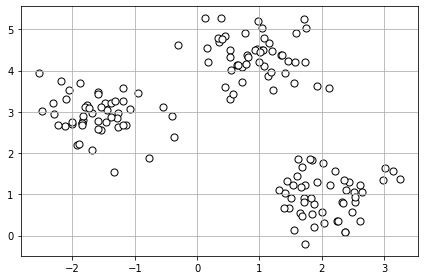

In [25]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from matplotlib import pyplot as plt

x, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(x[:,0],x[:,1], c='white', marker='o', edgecolors='black',s=50)
plt.grid()
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
pred = kmeans.fit_predict(x)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, 
                init="random", 
                n_init=10, 
                max_iter=300, 
                tol=1e-04, 
                random_state=0)

In [ ]:
y_pred = kmeans.fit_predict(x)

In [26]:
kmeans_plus = KMeans(n_clusters=3,
                     init="k-means++",
                     n_init=10,
                     max_iter=300,
                     tol=1e-04,
                     random_state=0)
pred_plus = kmeans_plus.fit_predict(x)

왜곡 : 72.48


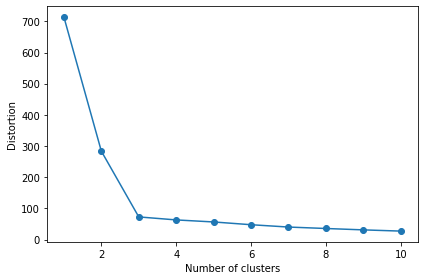

In [27]:
print('왜곡 : %.2f' % kmeans_plus.inertia_)

distortions = []
for i in range(1, 11):
    kmeans_plus = KMeans(n_clusters=i, 
                         init='k-means++', 
                         n_init=10, 
                         max_iter=300, 
                         random_state=0)
    kmeans_plus.fit(x)
    distortions.append(kmeans_plus.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

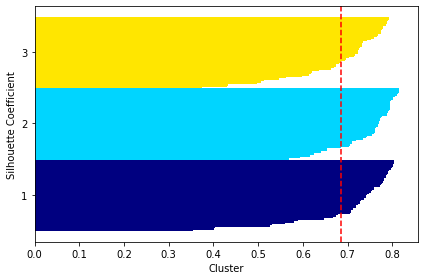

In [28]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(pred_plus)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, pred_plus, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred_plus == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_upper + y_ax_lower) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(c_silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels +1)
plt.xlabel('Cluster')
plt.ylabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import numpy as np

np.random.seed(12)
variables = ['x','y','z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']

x = np.random.random_sample([5, 3])*10
df = pd.DataFrame(x, columns=variables, index=labels)
df

,x,y,z
ID_0,1.541628,7.400497,2.633150
ID_1,5.337394,0.145750,9.187470
ID_2,9.007149,0.334214,9.569493
ID_3,1.372093,2.838284,6.060832
ID_4,9.442251,8.527355,0.022592


In [8]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,10.488008,12.400774,5.708900,8.396706
ID_1,10.488008,0.000000,3.694396,5.722693,13.080373
ID_2,12.400774,3.694396,0.000000,8.767847,12.588097
ID_3,5.708900,5.722693,8.767847,0.000000,11.573821
ID_4,8.396706,13.080373,12.588097,11.573821,0.000000


In [9]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

row_clusters = linkage(df, method='complete', metric='euclidean')

pd.DataFrame(row_clusters,
             columns=['row label 1','row label 2','distance','item no.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,item no.
cluster 1,1.0,2.0,3.694396,2.0
cluster 2,0.0,3.0,5.708900,2.0
cluster 3,4.0,6.0,11.573821,3.0
cluster 4,5.0,7.0,13.080373,5.0


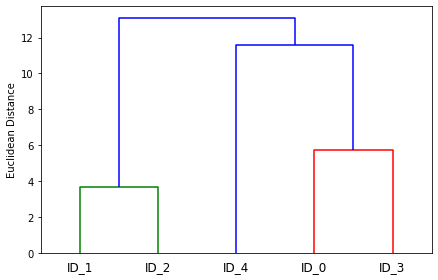

In [11]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_dendrogram = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(x)
print("클러스터 레이블 : %s" % labels)

클러스터 레이블 : [0 1 1 0 2]


In [13]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(x)
print("클러스터 레이블 : %s" % labels)

클러스터 레이블 : [0 1 1 0 0]
